In [8]:
# Imports
import math
import nltk
from nltk.corpus import cess_esp
import matplotlib.pyplot as plt

In [9]:
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [10]:

# Carga del corpus                         
corpus_sentences=cess_esp.tagged_sents()
number_sentences=len(corpus_sentences)

In [11]:
# Preprocesar etiquetas corpus
corpus = []
for s in (corpus_sentences):
    sentence=[]
    for x in s:
        word, tag = x
        if(word=='*0*' and tag.startswith('sn')):
            continue
        if(len(tag) >= 3):
            if(tag.startswith('v') or tag.startswith('F')):
                tag = tag[0:3]
            else:
                tag = tag[0:2]
        x = (word, tag)
        sentence.append(x)
    corpus.append(sentence)    

# **Hidden Markov Models Approach(HMM)**

Original corpus accuracy: [0.9283174828904097, 0.9237111533931321, 0.9228301472203911, 0.9251465103889185, 0.9228631913204551, 0.8781806196440343, 0.887891425743974, 0.8913107511045656, 0.8911650954798163, 0.8784427571832664]
Original corpus deviation: [0.020589808319485307, 0.0211882961050311, 0.02130012430832227, 0.021004323505633294, 0.021295944733093083, 0.026106432740275777, 0.02518237930077728, 0.024843071059600663, 0.024857680382111613, 0.026082220904978973]
Shuffled corpus accuracy: [0.9289944013781223, 0.9261574319313487, 0.9249959761789796, 0.9254976206314282, 0.9272536136662286, 0.9284084275327708, 0.9194408490810251, 0.925351724137931, 0.9251440544787847, 0.9242367734029516]
Shuffled corpus deviation: [0.020499830030312957, 0.020873401138332862, 0.02102372264926409, 0.020958979845771237, 0.020730147627570677, 0.02057775077885382, 0.021722847469933367, 0.020977837900041513, 0.021004640194425318, 0.021121184409629186]


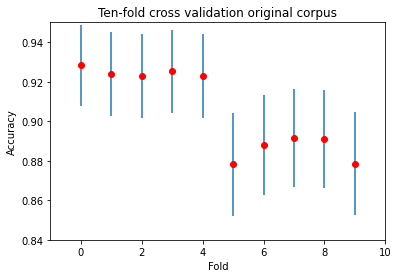

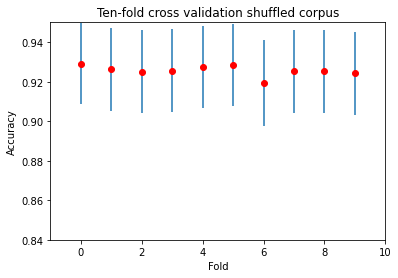

In [14]:
# Partir el corpus en train y test
number_sentences = len(corpus)
number_train_sentences = round(number_sentences*0.9)
number_test_sentences = number_sentences - number_train_sentences

from nltk.tag import hmm
from sklearn.model_selection import KFold
import numpy as np

c = np.array(corpus, dtype=object)

# Ten-fold cross-validation

# Resultados sin shuffle 
kf = KFold(n_splits=10, shuffle=False)
a =kf.get_n_splits(c)

non_shuffled_results = []
non_shuffled_conf = []

for train_index, test_index in kf.split(c):

    train = c[train_index]
    test = c[test_index]
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(train)
    ac = tagger_hmm.evaluate(test)
    non_shuffled_results.append(ac)
    ic = 1.96*math.sqrt((ac* (1-ac))/number_test_sentences)
    non_shuffled_conf.append(ic)

print('Original corpus accuracy: ' + str(non_shuffled_results))
print('Original corpus deviation: ' + str(non_shuffled_conf))

# Resultados con shuffle 
kf = KFold(n_splits=10, shuffle=True)
a =kf.get_n_splits(c)

shuffled_results =[]
shuffled_conf = []
for train_index, test_index in kf.split(c):

    train = c[train_index]
    test = c[test_index]
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(train)
    ac = tagger_hmm.evaluate(test)
    shuffled_results.append(ac)
    ic = 1.96*math.sqrt((ac* (1-ac))/number_test_sentences)
    shuffled_conf.append(ic)

print('Shuffled corpus accuracy: ' + str(shuffled_results))
print('Shuffled corpus deviation: ' + str(shuffled_conf))

# Print graphic for original results
x=[i for i in range(10)]
y=non_shuffled_results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation original corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=non_shuffled_conf,linestyle='None')
plt.show()

# Print graphic for shuffled results
x=[i for i in range(10)]
y=shuffled_results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation shuffled corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=shuffled_conf,linestyle='None')
plt.show()

#**Trigrams'n'Tags (TNT)**

Original corpus accuracy: [0.8963203270820371, 0.8886019751744133, 0.8864864864864865, 0.88949564908542, 0.8928287906853665, 0.8389584706657878, 0.8583445253410618, 0.8506627393225331, 0.8591370558375635, 0.8255173440524044]
Original corpus deviation: [0.02433189016196915, 0.025112491206031224, 0.025319624362368197, 0.02502413177278914, 0.024689970674732113, 0.02933841111855451, 0.027832032178867174, 0.028448554921733562, 0.02776687604508008, 0.030292606824607833]
Shuffled corpus accuracy: [0.9042602874785948, 0.9039974484371678, 0.901972096926466, 0.9013206944296517, 0.9011183355006502, 0.9017132551848512, 0.9001820713291206, 0.9015612595924848, 0.9009600529684396, 0.8992933786966762]
Shuffled corpus deviation: [0.02348498050316083, 0.023513777565944128, 0.023733884410583963, 0.02380401026649578, 0.023825729827115383, 0.02376178806957157, 0.023925822227908046, 0.0237781498742094, 0.02384269716911937, 0.024020228034278456]


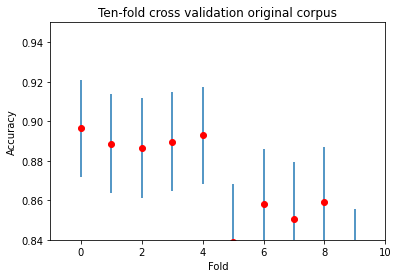

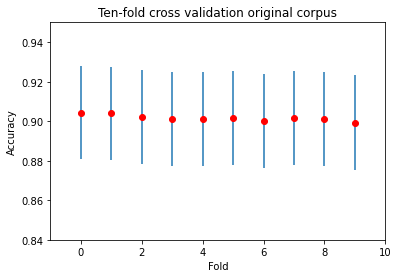

In [15]:
# Partir el corpus en train y test
number_sentences = len(corpus)
number_train_sentences = round(number_sentences*0.9)
number_test_sentences = number_sentences - number_train_sentences

from nltk.tag import tnt
from sklearn.model_selection import KFold
import numpy as np

c = np.array(corpus, dtype=object)

# Ten-fold cross-validation

# Resultados sin shuffle 
kf = KFold(n_splits=10, shuffle=False)
a =kf.get_n_splits(c)

non_shuffled_results = []
non_shuffled_conf = []

for train_index, test_index in kf.split(c):

    train = c[train_index]
    test = c[test_index]
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(train)
    ac = tagger_tnt.evaluate(test)
    non_shuffled_results.append(ac)
    ic = 1.96*math.sqrt((ac* (1-ac))/number_test_sentences)
    non_shuffled_conf.append(ic)

print('Original corpus accuracy: ' + str(non_shuffled_results))
print('Original corpus deviation: ' + str(non_shuffled_conf))

# Resultados con shuffle 
kf = KFold(n_splits=10, shuffle=True)
a =kf.get_n_splits(c)

shuffled_results =[]
shuffled_conf = []
for train_index, test_index in kf.split(c):

    train = c[train_index]
    test = c[test_index]
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(train)
    ac = tagger_tnt.evaluate(test)
    shuffled_results.append(ac)
    ic = 1.96*math.sqrt((ac* (1-ac))/number_test_sentences)
    shuffled_conf.append(ic)

print('Shuffled corpus accuracy: ' + str(shuffled_results))
print('Shuffled corpus deviation: ' + str(shuffled_conf))

# Print graphic for original results
x=[i for i in range(10)]
y=non_shuffled_results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation original corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=non_shuffled_conf,linestyle='None')
plt.show()

# Print graphic for shuffled results
x=[i for i in range(10)]
y=shuffled_results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation original corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=shuffled_conf,linestyle='None')
plt.show()